In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset   
dataset = pd.read_csv('data.csv')

#head of the dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#check the values that are null 
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#check the dataset Description
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#Now let’s have a look at the correlation between the features:
dataset.corr()

/tmp/ipykernel_15573/3783487441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


/tmp/ipykernel_15573/590589626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


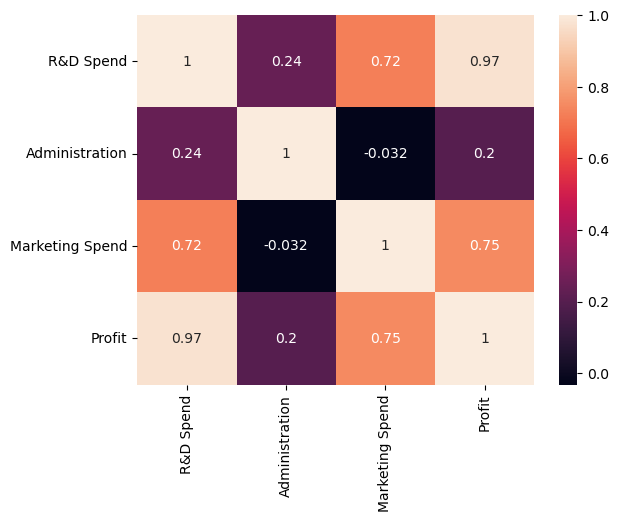

In [8]:
#show a heatmap of the correlation
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [9]:
#split the dataset into independent (X) and dependent (y) datasets
x = dataset[["R&D Spend", "Administration", "Marketing Spend"]]
y = dataset["Profit"]

In [10]:
x = x.to_numpyx = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
#use logistic regression to train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
#fit the model
regressor.fit(xtrain, ytrain)
    

LinearRegression()

In [15]:
ypred = regressor.predict(xtest)

In [17]:
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344


In [18]:
#show the model accuracy    
print("Accuracy:", regressor.score(xtest, ytest))

Accuracy: 0.900065308303732


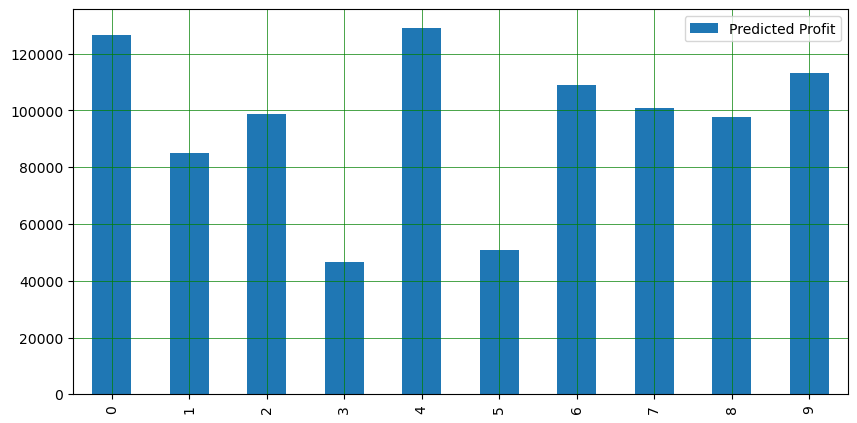

In [19]:
#plot a bar chart to show the difference between the actual and predicted values
data.head(25).plot(kind="bar", figsize=(10, 5))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")  
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [20]:
#show the coefficients of the model
print(regressor.coef_)
print(regressor.intercept_) 
    

[[ 0.80377928 -0.06792917  0.03124155]]
[54071.87574599]


In [21]:
#save the model using joblib
import joblib
joblib.dump(regressor, "profit_prediction_model.pkl")

#load the model
model = joblib.load("profit_prediction_model.pkl")  

In [23]:
#use the data from the user and use the trained model to make a prediction
rd_spend = float(input("Enter R&D Spend: "))
admin_spend = float(input("Enter Administration Spend: "))
marketing_spend = float(input("Enter Marketing Spend: "))   

profit = model.predict([[rd_spend, admin_spend, marketing_spend]])
print("Profit: ", profit[0][0]) 


Profit:  1065587.4175827636
